---
# Description

## Story
นักศึกษากำลังทำงานที่บริษัท Freelancer บริษัทพัฒนาเกม ในตำแหน่ง Data Engineer นักศึกษาได้รับมอบหมายให้ทำการวิเคราะห์ข้อมูลของเกมที่ขายดีที่สุดในปีที่ผ่านมา เพื่อช่วยในการตัดสินใจทางธุรกิจของบริษัท โดยใช้ข้อมูลจาก https://shorturl.at/7vvUg (vdo_game_sales.csv) 

---
# Exploratory Data Analysis (EDA)

In [1]:
# Importing Libraries
import pandas as pd

In [17]:
# Read the data
df = pd.read_csv('datasets/vdo_game_sales.csv')
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [4]:
# Show the data type of each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [5]:
# Show the summary statistics
df.describe() 

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [11]:
# Check missing values
df.isnull().sum() 

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [21]:
# Show the missing values in 'developer' column
df[df['developer'].isna()]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
8486,/games/boxart/21030ccc.jpg,Gourmet Chef: Cook Your Way to Fame,DS,Misc,Ubisoft,NaN,NaN,0.14,0.13,NaN,NaN,0.01,2008-06-24,NaN
10832,/games/boxart/2426879ccc.jpg,Wordmaster,DS,Strategy,"Destination Software, Inc",NaN,NaN,0.09,0.09,NaN,0.0,0.01,2008-08-12,NaN
18185,/games/boxart/8436780ccc.jpg,SAS: Secure Tomorrow,PC,Shooter,City Interactive,NaN,NaN,0.00,NaN,NaN,0.0,0.00,2008-10-16,NaN
18455,/games/boxart/default.jpg,My Baby and Me,Wii,Misc,Unknown,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN
19925,/games/boxart/default.jpg,Bounty Hunter,PC,Action,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-11-30,NaN
25045,/games/boxart/default.jpg,Abandoner,PC,Adventure,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-09-17,NaN
27407,/games/boxart/full_7747476AmericaFrontccc.jpg,The Enchanted Unicorn,PC,Adventure,Take-Two Interactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-09-16,NaN
31230,/games/boxart/full_8222233PALFrontccc.png,istanbul Beyleri,PC,Fighting,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-17,NaN
37057,/games/boxart/1105699ccc.jpg,Purrfect Pet Shop,PC,Misc,eGames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-06-13,NaN
40753,/games/boxart/default.jpg,Duludubi Star,PC,Platform,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['publisher'].value_counts()

publisher
Unknown               8842
Sega                  2207
Ubisoft               1663
Electronic Arts       1619
Activision            1582
                      ... 
Cancer Research UK       1
XperimentalZ Games       1
Nano Games               1
Cooking Mama Ltd.        1
PLAYDIUS                 1
Name: count, Length: 3383, dtype: int64

In [7]:
df['console'].value_counts()

console
PC      12617
PS2      3565
DS       3288
PS4      2878
PS       2707
        ...  
TG16        3
FDS         1
C128        1
Aco         1
BBCM        1
Name: count, Length: 81, dtype: int64

---
# Data Preprocessing

### Handling missing values
จัดการข้อมูลที่หายไปได้ด้วยวิธี ดังนี้
- ลบ column ที่มีข้อมูลที่หายไป --> df.drop()
- ลบ row ที่มีข้อมูลที่หายไป --> df.dropna()
- กำหนดค่าที่ต้องการให้กับข้อมูลที่หายไป --> df['column'].fillna('value')
- ใช้ค่าเฉลี่ยของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].mean())
- ใช้ค่ามัธยฐานของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].median())
- ใช้ค่าที่มากที่สุดของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].max())
- ใช้ค่าที่น้อยที่สุดของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].min())
- ใช้ค่าที่มีความถี่มากที่สุดของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].mode())

In [23]:
# Fill missing values in 'developer' column with 'Unknown'
df['developer'].fillna('Unknown', inplace=True)

In [25]:
# Check missing values
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

---
# Analyzing the data

In [86]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Top 15 Console'}, xlabel='console'>

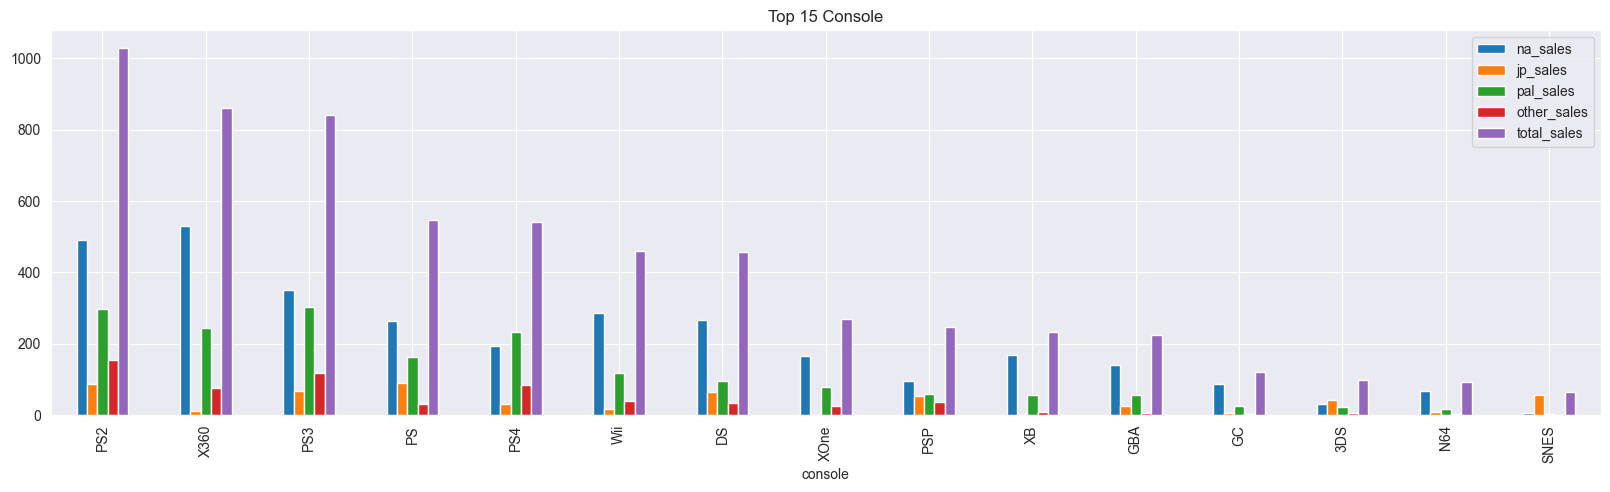

In [127]:
df_sales_groupby_console = df.groupby('console')[['na_sales','jp_sales','pal_sales','other_sales','total_sales']].sum()
df_sales_groupby_console = df_sales_groupby_console.loc[(df_sales_groupby_console!=0).all(axis=1)]
df_sales_groupby_console = df_sales_groupby_console.sort_values(by='total_sales', ascending=False).head(15)
df_sales_groupby_console.plot(kind='bar', figsize=(20,5), fontsize=10, title='Top 15 Console')

In [ ]:
plt.figure(figsize=(15, 5))
# sns.barplot(x='console', y='na_sales', data=df_sales_groupby_console)
# sns.barplot(x='console', y='jp_sales', data=df_sales_groupby_console)
# sns.barplot(x='console', y='pal_sales', data=df_sales_groupby_console)
# sns.barplot(x='console', y='other_sales', data=df_sales_groupby_console)

<Axes: xlabel='genre'>

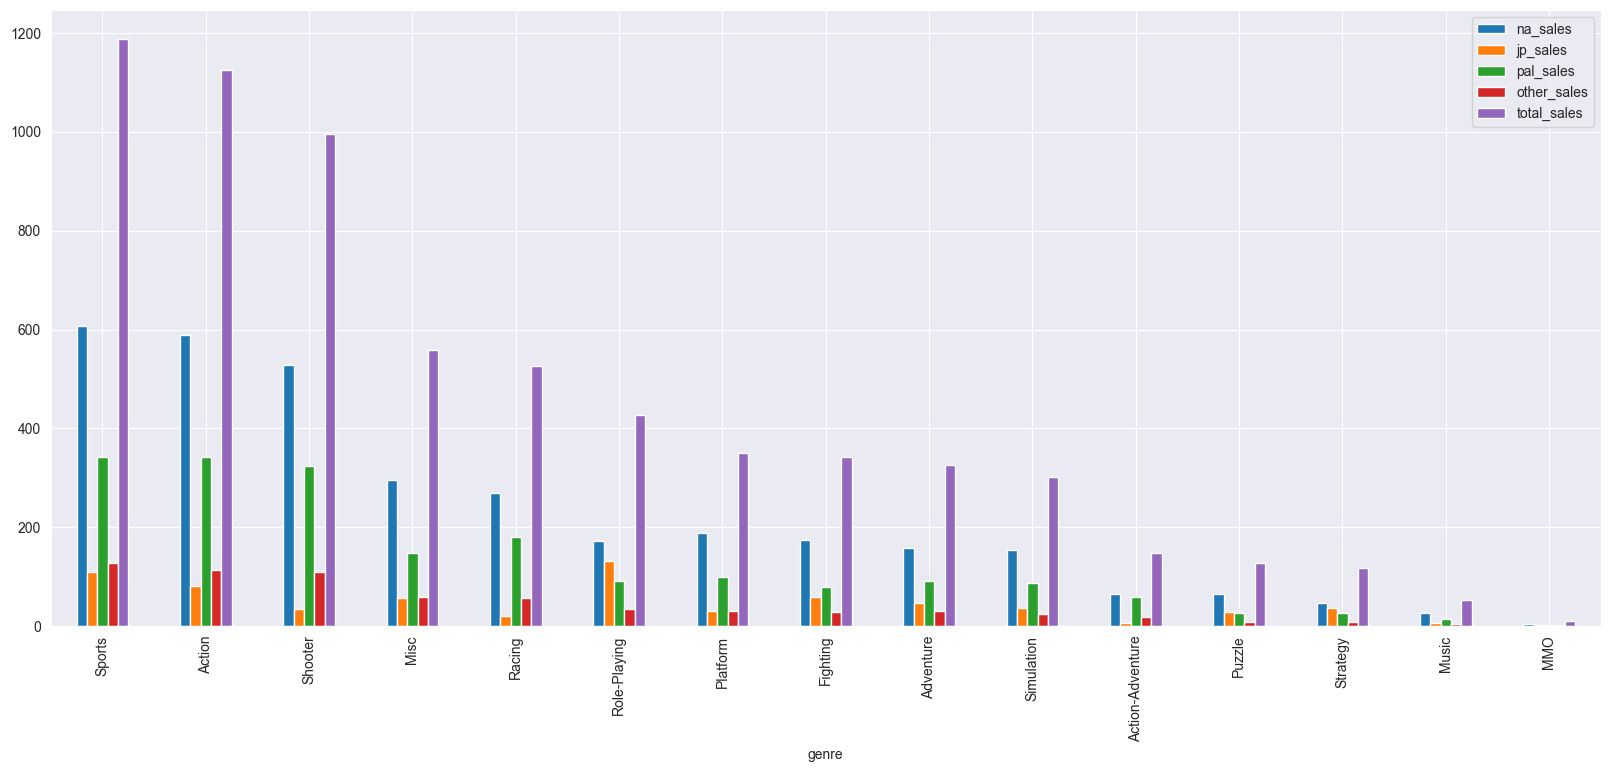

In [121]:
df_sales_groupby_genre = df.groupby('genre')[['na_sales','jp_sales','pal_sales','other_sales','total_sales']].sum()
df_sales_groupby_genre = df_sales_groupby_genre.loc[(df_sales_groupby_genre!=0).all(axis=1)]
df_sales_groupby_genre = df_sales_groupby_genre.sort_values(by='total_sales', ascending=False).head(15)
df_sales_groupby_genre.plot(kind='bar', figsize=(20,8), fontsize=10, title='Top 15 Genre')

<Axes: title={'center': 'a'}, xlabel='publisher'>

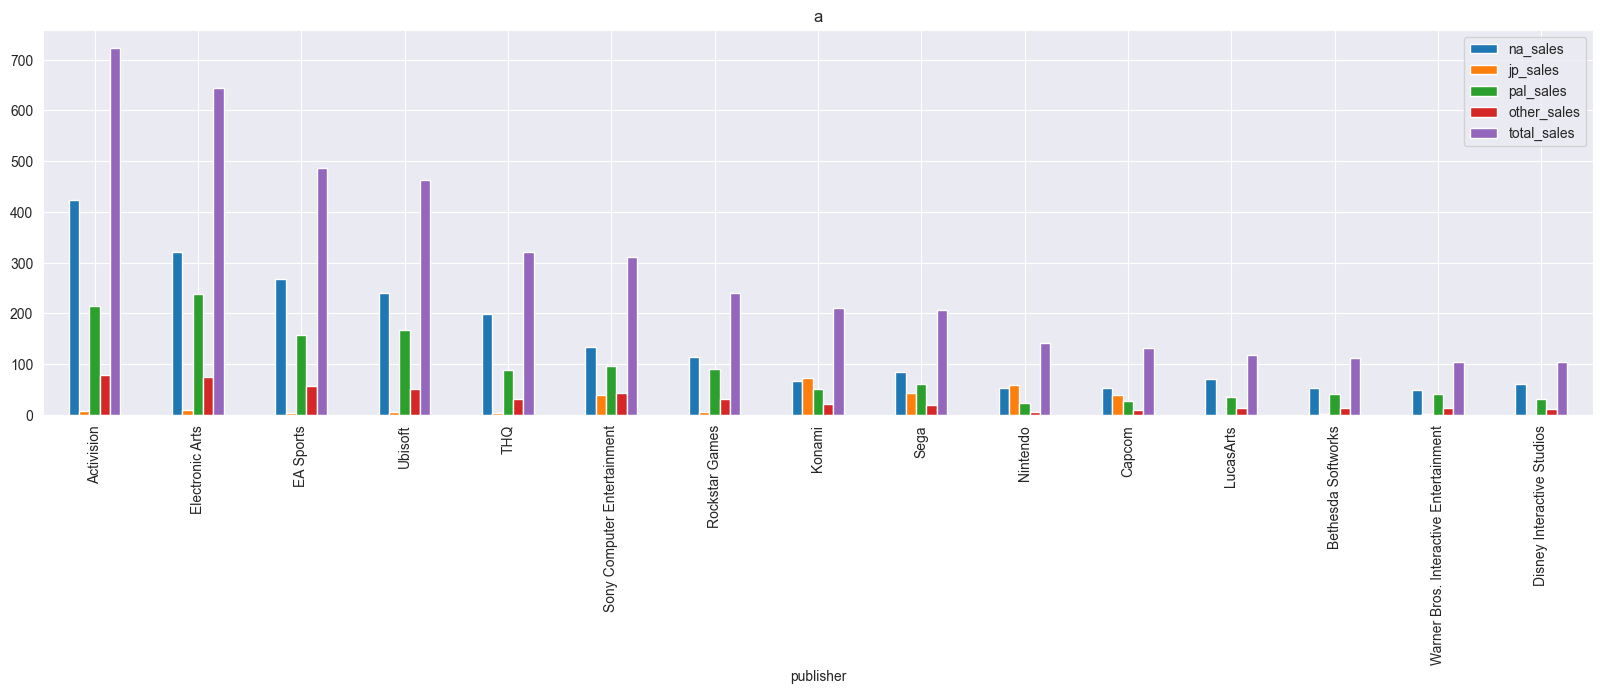

In [124]:
df_sales_groupby_publisher = df.groupby('publisher')[['na_sales','jp_sales','pal_sales','other_sales','total_sales']].sum()
df_sales_groupby_publisher = df_sales_groupby_publisher.loc[(df_sales_groupby_publisher!=0).all(axis=1)]
df_sales_groupby_publisher = df_sales_groupby_publisher.sort_values(by='total_sales', ascending=False).head(15)
df_sales_groupby_publisher.plot(kind='bar', figsize=(20,5), fontsize=10, title='Top 15 Publisher')